In [90]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import ds2s_OV

In [91]:
L = 10.0
K = 30
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0
x_init = np.array([(2 * i) / 10 for i in range(30)])
n_max = 100

In [92]:
model = ds2s_OV.ds2s_OV(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_init=x_init,
	n_max=n_max
)

In [93]:
model.simulate()

追い抜きが発生[n=76]
追い抜きが発生[n=77]
追い抜きが発生[n=78]
追い抜きが発生[n=79]
追い抜きが発生[n=80]
追い抜きが発生[n=81]
追い抜きが発生[n=82]
追い抜きが発生[n=83]
追い抜きが発生[n=84]
追い抜きが発生[n=85]
追い抜きが発生[n=86]
追い抜きが発生[n=87]
追い抜きが発生[n=88]
追い抜きが発生[n=89]
追い抜きが発生[n=90]
追い抜きが発生[n=91]
追い抜きが発生[n=92]
追い抜きが発生[n=93]
追い抜きが発生[n=94]
追い抜きが発生[n=95]
追い抜きが発生[n=96]
追い抜きが発生[n=97]
追い抜きが発生[n=98]
追い抜きが発生[n=99]
追い抜きが発生[n=100]


In [94]:
x = np.array([[j for i in range(K)] for j in range(n_max + 1)]) \
    .flatten()
y = model.x[:, :K].flatten()

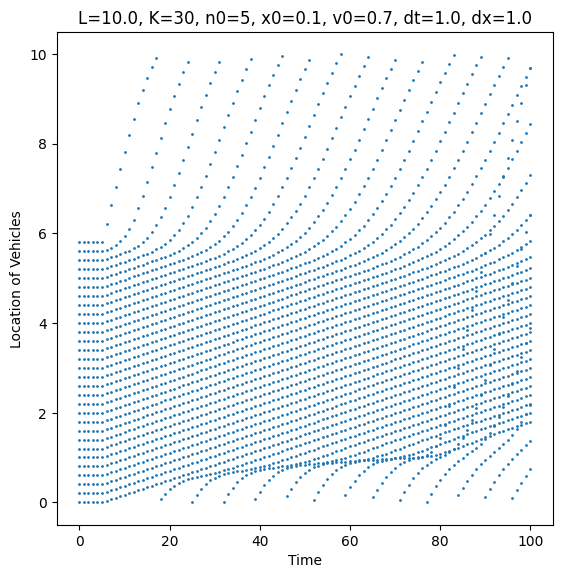

In [95]:
plt.figure(figsize=(6.4, 6.4))
plt.title(
    "L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
    	.format(L, K, n_0, x_0, v_0, dt, dx)
)
plt.xlabel("Time")
plt.ylabel("Location of Vehicles")
plt.scatter(x, y, s=1)
plt.show()